# Applications of Central Limit Theorem
Michelle Yaochai | Zheng Chong, Emily | Marvin Dragon Choo | Brian Ku\
01 Apr 2022

## Introduction
We explore the central limit theorem (CLT) and their applications in this notebook.

* In Part A, we define and illustrate CLT using examples such as coin flips and rolling a fair dice. We also show how to use CLT to calculate population parameters from samples, as well as situations where CLT fails.
* In Part B, we demonstrate the utility of CLT by simulating various physical systems, and validating key parameters against those predicted by CLT, and use it to calculate physical properties such as diffusion coefficients, ...

The following modules will be used in this notebook, each of which will be introduced as they are used.

In [1]:
# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.animation import FuncAnimation, PillowWriter

## Part A: Illustration

### Motivation (TODO)
first of all, def need to add where clt is used before definition. like clt is a concept found in statistics/statistical analysis when we have a population (defined) and we are trying to measure a characteristic of it. For example, in the population of CHS students, we want to see what the distribution of GPA? /height is like. Thus, we carry out a probability sample. 

...... then the fact that if you take enough probability samples and plot the sum of results in each sample, the distribution would always look sth like this [insert perfect histogram], where the mean, median and mode are in the center. this is a normal distribution and .... segue into clt definition

### Definition
Here, we give a common definition of Central Limit Theorem (CLT):

> The distribution of sample means approximates a normal distribution as the sample size gets larger, even if the population is not normally distributed.

This definition is certainly not the most mathematically rigorous, but is sufficient for the scope of the project. There are also additional restrictions necessary for CLT, and they will be introduced as appropriate.

We now illustrate the assertion that CLT is trying to make using coin flips. Consider the act of flipping a fair coin.
* Since the coin is fair, there is an equal probability $p=0.5$ of it landing on heads or tails.
* Assign the outcome of tails as 0, and heads as 1.

This system is equivalently represented by a binomial distribution (since there are only two outcomes) with probability of success (of getting heads) of 0.5.

To begin, let's see what happens when we flip the coin 100 times. Since this is a binomial distribution, we can make use of ```numpy.random.binomial``` to simulate these coin flips.

Out of 100 coin flips, there were 55 heads and 45 tails.


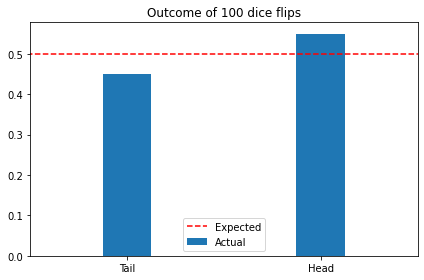

In [2]:
n = 100
p = 0.5

# Labels
flip_outcomes = ['Tail', 'Head']

# Data
# Count the number of heads after flipping a coin n times, each with probability p of landing on heads.
num_heads = np.random.binomial(n=n,p=p)
# 
num_tails = n - num_heads

# Show outcome
print(f'Out of {n} coin flips, there were {num_heads} heads and {num_tails} tails.')

# Plot
# Expected
plt.bar(flip_outcomes, [num_tails/n, num_heads/n], width=0.25, label='Actual')
# Actual
plt.hlines(y=0.5, xmin=-0.6, xmax=1.6, linestyles='--',
           colors='red', label='Expected')

# Customize and Show
plt.xlim([-0.5, 1.5])
plt.title(f'Outcome of {n} dice flips')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()


If asked to predict the number of heads, it is probably *instinctive* to expect 50 of each, after all, we expect an equal number of heads and tails.

Most of the time, we get a number that *feels* close to, but not exactly 50. Try running the above cell multiple times! Here, we take this opportunity to explain more key terms.

* Each time you execute the cell, you generate one **sample** of 100 coin flips.
* The **sample size $n$** is the number of independent coin flips that were performed. Here, it is 100.
* The direct output of each sample, which is a number between 0 and 100, is the total number of heads in that sample.

### Sampling Distribution
Now that you've run the cell multiple times, you can see that each time you run it, you get a different result. Even though the coin is the same, there is still some variability between the different samples collected from this 'population'.

Yet, it is not equally likely to obtain each outcome. Using a sample size of 100, it *feels* more probable to observe a sample with 40 heads, than that of 10 heads, which feels more extreme. We can visualize this probability by simulating many independent samples, and observing the distribution of the number of heads, using a histogram.
* This is what *'distribution of sample means'* in the definition of CLT is referring to.

Surprisingly, generating this data can be done in one line of code, again using ```numpy.random.binomial```. In particular, we vary the sample sizes and observe the impact on the subsequent distribution.

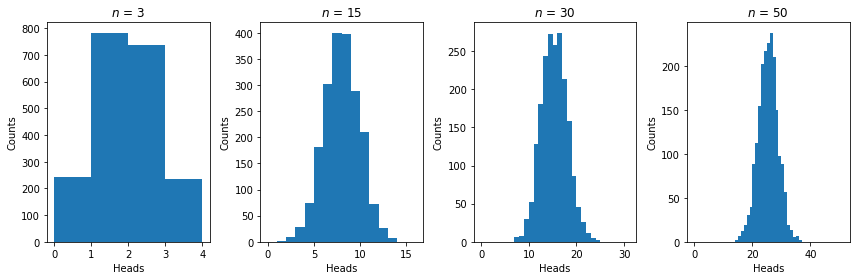

In [3]:
# Individual sample sizes to test
n = [3, 15, 30, 50]
# Fair coin, equal chance of heads and tails
p = 0.5
# Generate 2000 independent samples
s = 2000

# Data
flip_distribution = [np.random.binomial(i, p, s) for i in n]

# We will reuse this later, so putting it in a function first


def plot_coin_flip_CLT(flip_distribution, n, normalize = False):
    fig, ax = plt.subplots(ncols=len(n), figsize=(3*len(n), 4))

    # Making good histograms
    for i, dist in enumerate(flip_distribution):
        min_value = min(dist)
        max_value = max(dist)

        # Max ensures that step sizes in the following histogram are at least 1, but otherwise such that there will be around 30 bins
        step_size = max((max_value-min_value)//30, 1)
        # n+2 ensures the outcome with all heads is also captured.
        bin_range = range(0, n[i]+2, step_size)

        # Plot histogram and customize
        ax[i].hist(dist, bins=bin_range, density=normalize)
        ax[i].set_xlabel('Heads')
        ax[i].set_ylabel('Counts')
        ax[i].set_title(f'$n$ = {n[i]}')

    return fig, ax


plot_coin_flip_CLT(flip_distribution, n)
plt.tight_layout()
plt.show()

Restating CLT from above, we can quite clearly observe that:
> The *distribution of sample means* approximates a normal distribution *as the sample size gets larger*, even if the population is not normally distributed.

* In particular, the 'distribution of population' here is the distribution of the probability of the outcomes of coin flip - 0.5 for heads and tails, certainly not normally distributed.

### CLT conditions
In practice, we impose some further conditions before using CLT, to account for more extreme probability distribution functions. We will summarise the conditions necessary for CLT to hold true:

* The data must be sampled randomly from the population by using a probability sampling method.
* Each of the sample values must be independent of each other. That is, the occurrence of one event does not affect the occurrence of any other event.
* When the sample is drawn without replacement, the sample size must be no larger than 10% of the total population.
* Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

If all these conditions are fulfilled, then, by the central limit theorem, the sampling distribution obtained will represent a normal distribution, regardless whether the variable actually follows a normal distribution in the population. (eg. In Asia, people's heights are skewed towards the shorter end.)

## Direct Application
We can now easily control the conditions of sampling to generate a normal distribution. To turn CLT into a useful tool, we need to establish a link between the sample statistics and population statistics.

### Population statistics
The mean and variance of a single flip of a fair coin is given by:
$$\mu = 0.5(0) + 0.5(1) = 0.5$$
$$\sigma^2 = 0.5 (1-0.5)^2 + 0.5 (0-0.5)^2 = 0.25$$

### Expectation value
Scaling this up to $n$ independent coin flips, we *expect* the subseuqent distribution to have both mean and variance scaled up by $n$.
* The mathematical derivation is beyond the scope of this project.

Let $X$ represent the distribution of number of heads (i.e. what we have been plotting), then,
$$E(\bar{X}) = n\mu$$
where $\bar{X}$ is mean number of heads, and $\mu$ is the expected number of heads for a flip.
$$E(Var(X))=n\sigma^2$$
where $Var(X)$ is the variance of the number of heads, and $\sigma^2$ is the expected variance in the number of heads per flip.

### Utility
This also means that if we did not know the population mean and variance (for example, if we **did not know** that the coin is fair, and this is true in the applications of CLT), our best guess for them would then be
$$\mu=\bar{X}/n$$
$$\sigma^2 = Var(X)/n$$

Therefore, we do the following here:
 
1. Compare the *expected* distribution against the actual data, and show a good agreement for high $n$ values.
   * The expected distribution is normal, with $(\mu,\sigma^2)=(0.5n,0.25n)$
   * In a normal curve, a higher mean corresponds to a curve shifted to the right, and a higher variance corresponds to a wider curve.
   * We use ```scipy.stats.norm``` to obtain this normal curve.
2. Estimate the true mean and variance of the coin from the observed distributions.

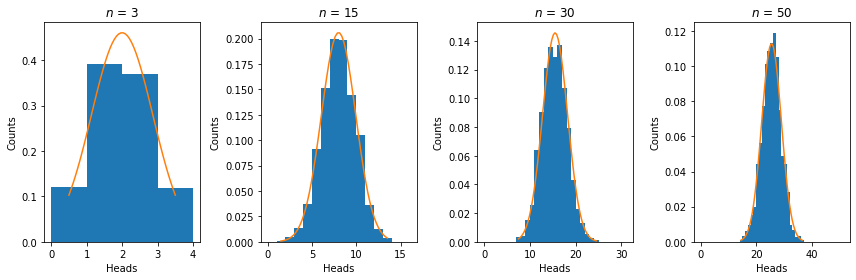

Best estimates
n=3: μ=mean/n=0.495, σ^2=var/n=0.243
n=15: μ=mean/n=0.5, σ^2=var/n=0.249
n=30: μ=mean/n=0.495, σ^2=var/n=0.251
n=50: μ=mean/n=0.499, σ^2=var/n=0.239


In [4]:
def get_normal_points(mean=0,var=1,x_min=0,x_max=1):
    x = np.linspace(x_min,x_max,endpoint=True)
    # norm takes in mean,std
    y = norm(mean,var**0.5).pdf(x)
    return x,y

# Plot again, but this time we superimpose the normal curve to see the fit
fig, ax = plot_coin_flip_CLT(flip_distribution, n, True)

for i, dist in enumerate(flip_distribution):
    x,y = get_normal_points(0.5*n[i],0.25*n[i],min(dist),max(dist))
    # +0.5 is to offset, observe that for i heads it will be plotted between i and i+1 when there are only 3 bins
    # Thus the normal curve should be plotted on i+0.5
    # This is only an issue for n=3 case, when there are sufficient bins, the offset is negligible
    ax[i].plot(x+0.5,y)

plt.tight_layout()
plt.show()    

# Print the estimations
print('Best estimates')
for i, dist in enumerate(flip_distribution):
    print(f'n={n[i]}: μ=mean/n={(np.mean(dist)/n[i]).round(3)}, σ^2=var/n={(np.var(dist)/n[i]).round(3)}')

Random dice roll, N sided fair dice.

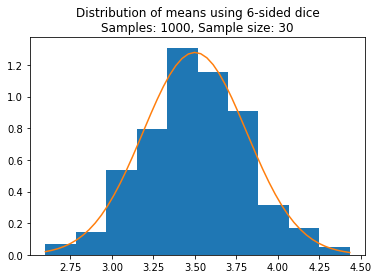

In [5]:

def plot_N_sided_dice(sides = 6, size = 30, samples = 1000):
    # Theoretical mean and variance
    mean_theory = (sides+1)/2
    # Var = E(X^2) - (E(X))^2
    var_theory = ((sides+1)*(2*sides+1)/6) - mean_theory**2

    # List of sample means (sample size as specified) of n-sided dice rolls
    dice_mean_dist =  [np.mean(np.random.randint(1, sides+1, size)) for _ in range(samples)]
    
    # Getting points for normal graph
    x,y = get_normal_points(mean_theory,var_theory/size,min(dice_mean_dist),max(dice_mean_dist))
    
    plt.hist(dice_mean_dist,density=True)

    # Not doing the offset, low sample sizes should not be used, especially after CLT was just demonstrated
    plt.plot(x,y)
    plt.title(f'Distribution of means using {sides}-sided dice\nSamples: {samples}, Sample size: {size}')
    plt.show()

plot_N_sided_dice()

## Part B: Demonstration

Random Walk
1D Random Walk
* In a simple one-dimentional random walk, an object at the origin along a linear axis can either move a distance of +1 or -1 with equal probability. This will be called a step. When the object moves N number of steps, assuming that the steps are independent N is large enough, the probability distribution of the object's position approaches a Normal distribution.

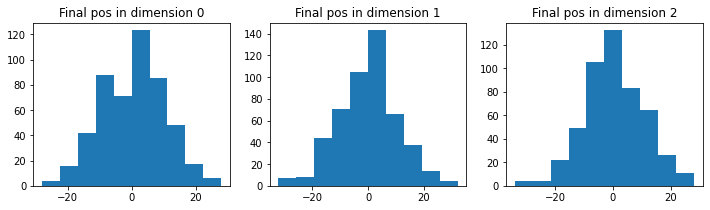

In [6]:
def next_pos(prev_pos,p=0.5):
    return prev_pos + np.random.choice([-1, 1],p=[1-p,p])


def random_walk_1D(steps=100):
    pos_list = [0]
    for _ in range(steps):
        pos_list.append(next_pos(pos_list[-1]))
    return np.array(pos_list)


def random_walk_ND(steps=100, n=2):
    # ND walk = N*1D walk -- independence across dimensions
    # Access via arr[dim,time]
    return np.array([random_walk_1D(steps) for _ in range(n)])


def ND_walk_displacement(steps=100, n=2, samples=1000):
    # Take specified samples, for each of them, take the position at last step of each dimension
    # Access via arr[sample,dim]
    return np.array([random_walk_ND(steps, n)[:, -1] for _ in range(samples)])


# Data
n = 3
ND_walk_pos = ND_walk_displacement(n=n, samples=500)

# Plot ND distribution
fig, ax = plt.subplots(ncols=n, figsize=(4*n, 3))
for i in range(n):
    ax[i].hist(ND_walk_pos[:, i])
    ax[i].set_title(f'Final pos in dimension {i}')
plt.show()

## Gambler's Ruin Problem

Consider a gambler who starts with \$i. On each successive gamble, he either wins \$1 with a probability of $p$, or loses \$1 with a probability of $(1−p)$, independent of the past.

The game ends when:
- The gambler earns his desired amount of $\$N$ ($0 < i < n$) and wins, or
- The gambler goes broke, i.e., is ruined,

whichever happens first.

Let us define some terms:
- $R_n$ - Total fortune after the $n^{th}$ gamble. (0 < i < N)
- $P_i$ - Probability that the gambler wins when $R_0 = i$.
- $\mu_i$ - Expected number of plays until the game ends, starting from $i$

We can explore this scenario by modelling the system with random walks of step length step length +1 (with probability $p$) or -1 (with a propability $(1-p)$). For each case, we will simulate a specified number of runs and plot the distributions of the outcomes.  

**Case 1: Fair Game ($p = 0.5$)**

It can be proven that:
- $P_i = \dfrac{i}{N}$
- $\mu_i = i(N-i)$

**Case 2: Unfavourable Odds ($p\neq q$)**

It can be proven that: ($r=\dfrac{1-p}{p}$)
- $P_i = \dfrac{1-r^i}{1-r^N}$
- $\mu_i = \dfrac{r+1}{r-1}(i-\dfrac{N(1-r^i)}{1-r^N})$

We can also prove that, if a player plays until he goes broke (i.e., as $N$ approaches infinity):
- If $p>0.5$, there is a nonzero probability that the player will become infinitely rich.
- If $p\le0.5$, the player will definitely go broke. In other words, a gambler playing a game with negative expected value will eventually be ruined.

**Sources:**

- http://www.columbia.edu/~ks20/FE-Notes/4700-07-Notes-GR.pdf
- https://www.youtube.com/watch?v=Ne2lmAZI4-I
- https://web.mit.edu/neboat/Public/6.042/randomwalks.pdf
- https://www.academia.edu/18573894/Variance_of_the_game_duration_in_the_gambler_s_ruin_problem (This gives the variance for the number of plays before game ends, which we will not use)

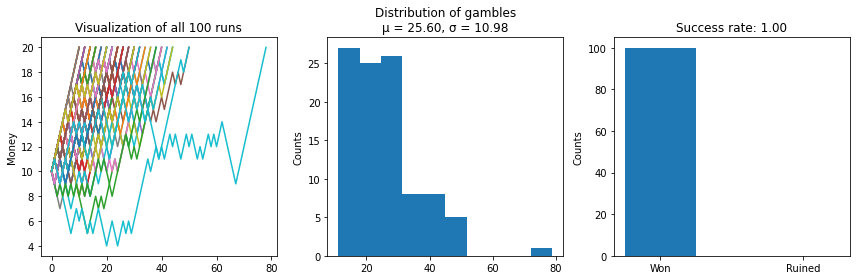

In [7]:
def single_gambler_ruin(i=10,N=20,p=0.5):
    fortune_list = [i]
    while True:
        # Reusing random walk code!
        fortune_list.append(next_pos(fortune_list[-1],p))
        if fortune_list[-1] == 0 or fortune_list[-1] == N:
            return np.array(fortune_list)

def multi_gambler_ruin(i=10,N=20,p=0.5,runs=100):
    # Access via pot_n = arr[run,n]
    return np.array([single_gambler_ruin(i,N,p) for _ in range(runs)],dtype=object)

def plot_gambler_ruin(result):
    fig, ax = plt.subplots(ncols =3, figsize=(12,4))
    
    # Plot runs, and also count number of losses and wins
    loss, win = 0,0
    for run in result:
        ax[0].plot(run)
        if run[-1] == 0:
            loss += 1
        else:
            win += 1
    
    # Plot time taken
    run_lengths = [len(run) for run in result]
    ax[1].hist(run_lengths)

    # Plot wins vs loss
    ax[2].bar(("Won","Ruined"),(win, loss), width = 0.5)
    
    # Customize
    ax[0].set_ylabel('Money')
    ax[1].set_ylabel('Counts')
    ax[2].set_ylabel('Counts')

    ax[0].set_title(f'Visualization of all {len(result)} runs')
    ax[1].set_title(f'Distribution of gambles\nμ = {np.mean(run_lengths):.2f}, σ = {np.std(run_lengths):.2f}')
    ax[2].set_title(f'Success rate: {win/(loss+win):.2f}')
    
    plt.tight_layout()
    plt.show()

plot_gambler_ruin(multi_gambler_ruin(p=0.7,runs=100))

# TODO: Think if this is really adds value -- connect to CLT..?
#     if p == 0.5:
#         print("Expected probability of wins = ", i/N)
#         print("Expected number of plays = ", i*(N-i))
    
#     else:
#         r = (1-p)/p
#         print("Expected probability of wins = ", (1-r**i)/(1-r**N))
#         print("Expected number of plays = ", ((r+1)/(r-1))*(i-(N*(1-r**i))/(1-r**N)))

#     print("Probability of wins in simulation = ", number_of_wins/number_of_runs)
#     print("Average number of plays in simulation = ", np.average(number_of_plays))



p=0.54


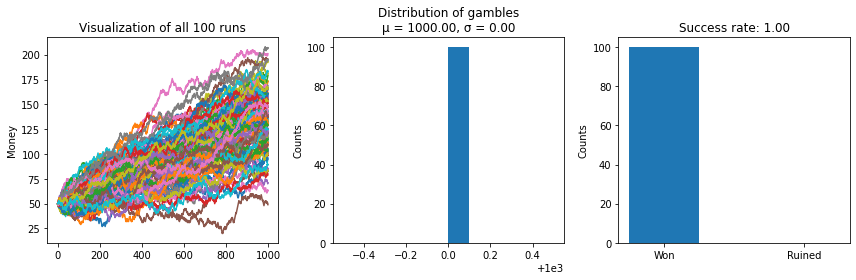

p=0.52


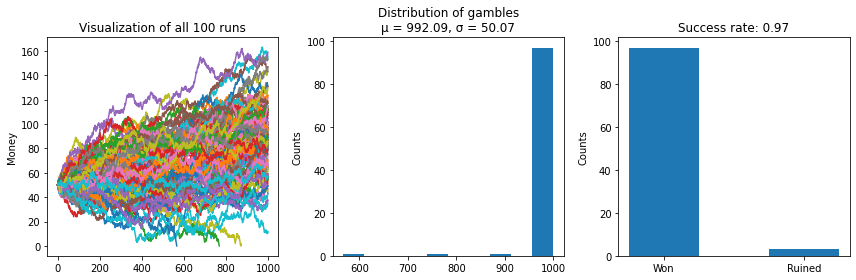

p=0.5


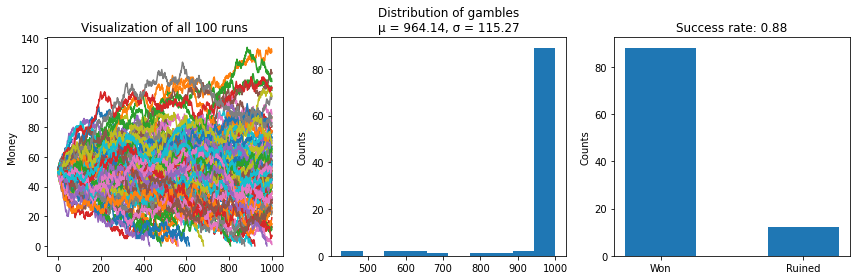

p=0.48


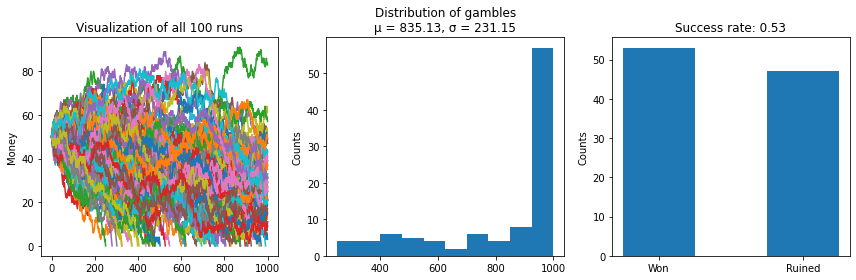

p=0.46


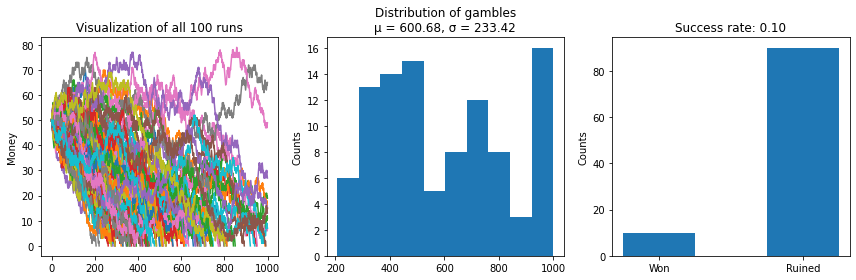

In [8]:
def single_gambler_ruin_infinite(i=10,p=0.5,max_step=1000):
    # Highly similar to finite version, except modified exit condition
    fortune_list = [i]
    while len(fortune_list) < max_step:
        # Reusing random walk code!
        fortune_list.append(next_pos(fortune_list[-1],p))
        if fortune_list[-1] == 0:
            break
    return np.array(fortune_list)

def gamblers_ruin_infinite(i=50, p=0.7, runs=100, max_step=1000):
    return np.array([single_gambler_ruin_infinite(i,p,max_step) for _ in range(runs)],dtype=object)

for p in [0.54,0.52,0.5,0.48,0.46]:
    print(f'p={p}')
    plot_gambler_ruin(gamblers_ruin_infinite(p=p))
